In [2]:
%matplotlib inline 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Physical constants
m_e = 1e-27
m_p = 1836 * m_e
c = 3e10
k_B = 1.4e-16
h = 2 * np.pi * 1e-27
h_bar = 1e-27
steph_boltz = 6e-5
a_0 = 5e-9
e = 5e-10
eV = 1.6e-12

def planck(nu, T):
    return 2 * h * nu ** 3 / (c ** 2 * (np.exp(h * nu / (k_B * T)) - 1))

In [2]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(0.1, nu_peak + 4e12, 1000)

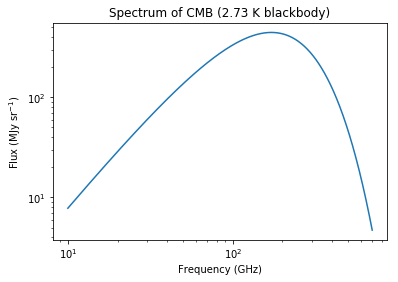

In [5]:
plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

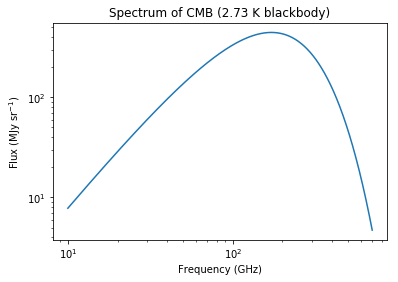

In [6]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 70 * 1e10, 1000)

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

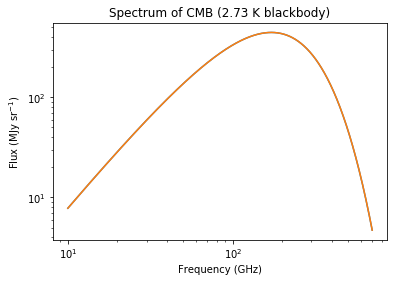

In [7]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 70 * 1e10, 1000)

nu1 = nu * 1.0004

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.plot(nu1 / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

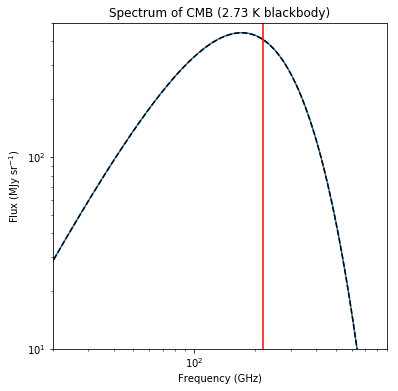

In [41]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

y = 1e-4
# y=0.2
change = 1 + 4 * y

fig = plt.figure(figsize=(6,6))
plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.plot(nu / 1e9 * change, planck(nu, T/change) / 1e-23 / 1e6, 'k--')
plt.axvline(x=218, color='r')
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10, 500)
plt.xlim(20, 900)
plt.show()

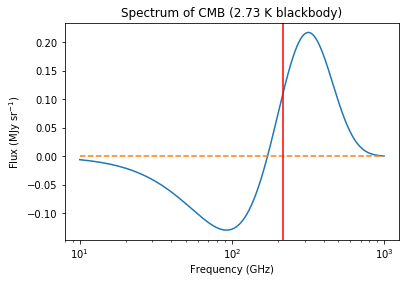

In [45]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

ratio = 1.0004
plt.plot(nu / 1e9, planck(nu / ratio, T) / 1e-23 / 1e6 - planck(nu, T) / 1e-23 / 1e6)
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.show()

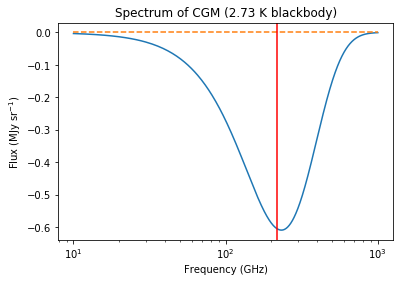

In [97]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

ratio = 1.0004
plt.plot(nu / 1e9, (planck(nu, T / ratio) - planck(nu, T)) / (ratio ** 4 * 1e-23 * 1e6))
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.title(r'Spectrum of CGM (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.show()

In [98]:
ratio**4

1.0016009602560254

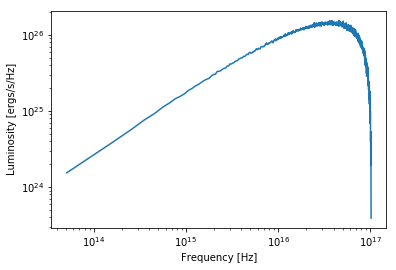

In [46]:
eV2Hz = eV / h
gamma = 10
beta = 1.
E_in = 1 * eV2Hz
tau = 0.01
L_s = 1e43
N_p = int(1e6)
L_p = L_s / N_p

cos1 = np.random.uniform(-1, 1, N_p)
cos2 = np.random.uniform(-1, 1, N_p)

E_outs = E_in * gamma**2 * (1 - beta * cos1) * (1 + beta * cos2)
hist, bins = np.histogram(E_outs, bins=1000)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq
plt.loglog(fqs, L_out)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [ergs/s/Hz]')
plt.show()

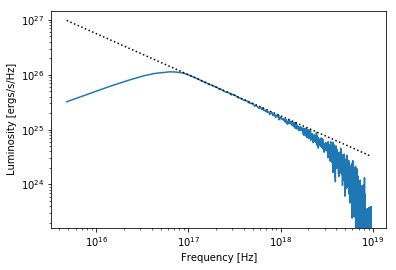

In [127]:
def sample_powerlaw(x_0, x_1, n, size):
    y = np.random.uniform(0, 1, size=size)
    return ((x_1**(n+1) - x_0**(n+1)) * y + x_0**(n+1))**(1./(n+1))

gamma_min, gamma_max = 10, 100
p = 2.5
gammas = sample_powerlaw(gamma_min, gamma_max, -p, size=N_p)
E_outs = E_in * gammas**2 * (1 - beta * cos1) * (1 + beta * cos2)
hist, bins = np.histogram(E_outs, bins=1000)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq
plt.loglog(fqs, L_out)
plt.loglog(fqs, 1e26*(fqs/1e17)**(-(p-1)/2.), 'k:')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [ergs/s/Hz]')
plt.show()

In [119]:
T_in = 0.290 / E_in
T_in

1.2083333333333332e-15

In [120]:
E_in

240000000000000.0

In [121]:
0.290/2.73

0.10622710622710622

In [122]:
h*c/(0.106)/(1.6e-12)

0.0011114124953737474

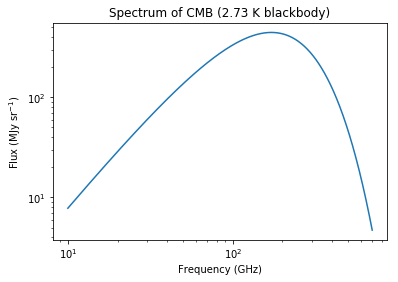

In [47]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 70 * 1e10, 1000)

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [50]:
maximum = max(planck(nu, T))
def sample_blackbody(nus, size):
    y = np.random.uniform(nus[0], nus[-1], size=size)
    samples = []
    for freq in y:
        rand = np.random.uniform(0, maximum)
        if rand < planck(freq, T):
            samples.append(freq)
    return samples

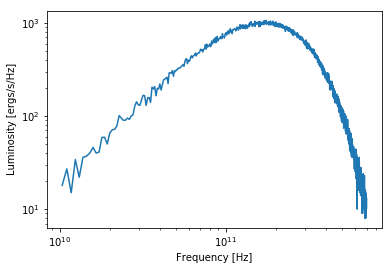

In [60]:
hist, bins = np.histogram(sample_blackbody(nu, int(1e6)), bins=1000)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
plt.loglog(fqs, hist)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [ergs/s/Hz]')
plt.show()

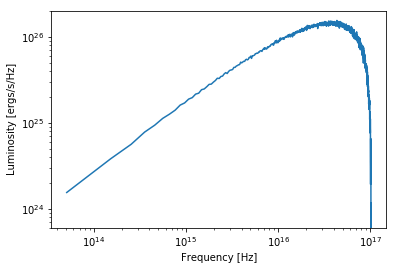

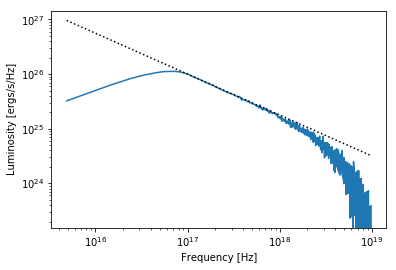

In [61]:
eV2Hz = eV / h
gamma = 10
beta = 1.
E_in = 1 * eV2Hz
tau = 0.01
L_s = 1e43
N_p = int(1e6)
L_p = L_s / N_p

cos1 = np.random.uniform(-1, 1, N_p)
cos2 = np.random.uniform(-1, 1, N_p)

E_outs = E_in * gamma**2 * (1 - beta * cos1) * (1 + beta * cos2)
hist, bins = np.histogram(E_outs, bins=1000)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq
plt.loglog(fqs, L_out)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [ergs/s/Hz]')
plt.show()

def sample_powerlaw(x_0, x_1, n, size):
    y = np.random.uniform(0, 1, size=size)
    return ((x_1**(n+1) - x_0**(n+1)) * y + x_0**(n+1))**(1./(n+1))

gamma_min, gamma_max = 10, 100
p = 2.5
gammas = sample_powerlaw(gamma_min, gamma_max, -p, size=N_p)
E_outs = E_in * gammas**2 * (1 - beta * cos1) * (1 + beta * cos2)
hist, bins = np.histogram(E_outs, bins=1000)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq
plt.loglog(fqs, L_out)
plt.loglog(fqs, 1e26*(fqs/1e17)**(-(p-1)/2.), 'k:')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [ergs/s/Hz]')
plt.show()

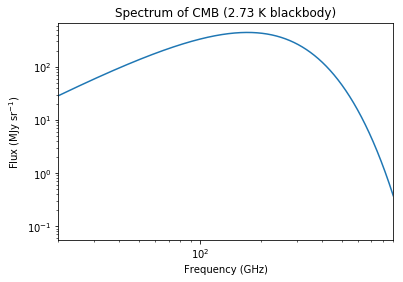

1.0159281922178944


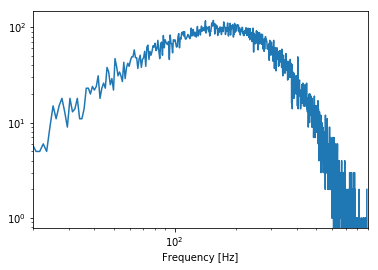

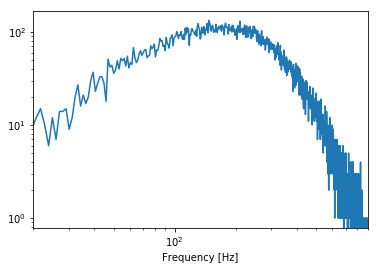

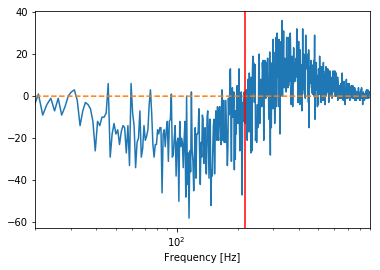

In [74]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak

# Range of frequencies to plot
# nu = np.linspace(200, 900, 1000)
nu = np.linspace(1e9, 900e9, int(1e5))

def planck(nu, T):
    return 2 * h * nu ** 3 / (c ** 2 * (np.exp(h * nu / (k_B * T)) - 1))

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(20, 900)
plt.show()

maximum = max(planck(nu, T))

def sample_blackbody(nus, size):
    y = np.random.uniform(nus[0], nus[-1], size=size)
    samples = []
    for freq in y:
        rand = np.random.uniform(0, maximum)
        if rand < planck(freq, T):
            samples.append(freq)
    return np.array(samples)

def sample_powerlaw(x_0, x_1, n, size):
    y = np.random.uniform(0, 1, size=size)
    return ((x_1**(n+1) - x_0**(n+1)) * y + x_0**(n+1))**(1./(n+1))

eV2Hz = eV / h
T_e = 1e8
v = np.sqrt(2 * k_B * T_e / m_e)
beta = v / c
gamma = 1 / np.sqrt(1 - beta ** 2)
print(gamma)
# E_in = 1 * eV2Hz
tau = 0.01
# L_s = 1e43

blackbody_freqs = sample_blackbody(nu, len(nu))
flat = [nu_peak]*len(blackbody_freqs)

hist_b, bins_b = np.histogram(blackbody_freqs, bins=int(1e3))
fqs_b = 0.5 * (bins_b[1:] + bins_b[:-1])
dfq_b = fqs_b[1] - fqs_b[0]
plt.loglog(fqs_b / 1e9, hist_b)
plt.xlabel('Frequency [Hz]')
# plt.ylabel('Luminosity [ergs/s/Hz]')
plt.xlim(20, 900)
plt.show()

N_p = int(tau * len(blackbody_freqs))
N_p = len(blackbody_freqs)
# L_p = L_s / N_p

cos1 = np.random.uniform(-1, 1, N_p)
cos2 = np.random.uniform(-1, 1, N_p)

affected = blackbody_freqs[:N_p]
unaffected = blackbody_freqs[N_p:]
E_outs = np.append(affected * gamma ** 2 * (1 - beta * cos1) * (1 + beta * cos2), unaffected)
hist, bins = np.histogram(E_outs, bins=int(1e3))
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
# L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq
plt.loglog(fqs / 1e9, hist)
plt.xlabel('Frequency [Hz]')
# plt.ylabel('Luminosity [ergs/s/Hz]')
plt.xlim(20, 900)
plt.show()

from scipy.signal import savgol_filter
plt.plot(fqs / 1e9, hist_b - hist)
# plt.plot(fqs / 1e9, savgol_filter(hist - hist_b, 75, 1))
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.xlabel('Frequency [Hz]')
# plt.ylabel('Luminosity [ergs/s/Hz]')
plt.xlim(20, 900)
plt.xscale('log')

plt.show()

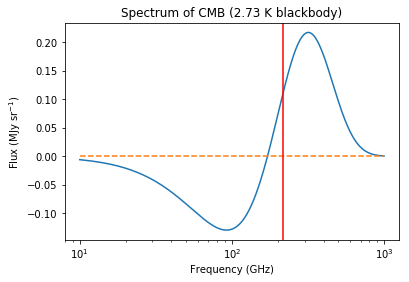

In [4]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak
extent = 1e12

# Range of frequencies to plot
nu = np.linspace(1e10, 100 * 1e10, 1000)

ratio = 1.0004
plt.plot(nu / 1e9, planck(nu / ratio, T) / 1e-23 / 1e6 - planck(nu, T) / 1e-23 / 1e6)
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.show()

In [94]:
T_e = 1e8
v = np.sqrt(3 * k_B * T_e / m_e)
'%e' % v

'6.480741e+09'

In [95]:
v / c

0.21602468994692867

In [ ]:
np.meanplanck(fqs_b, T) / hist_b

In [113]:
a = np.log(np.arange(15))

/Users/bryanbrzycki/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


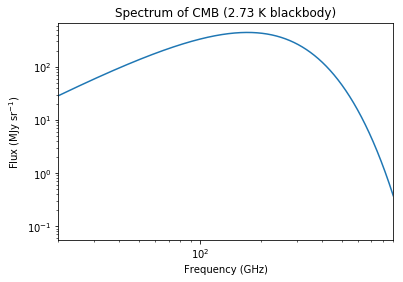

1.0159281922178944


/Users/bryanbrzycki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


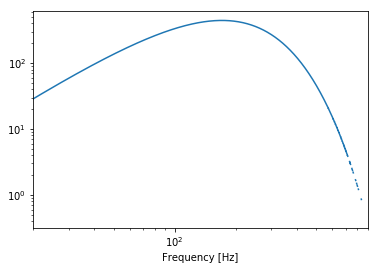

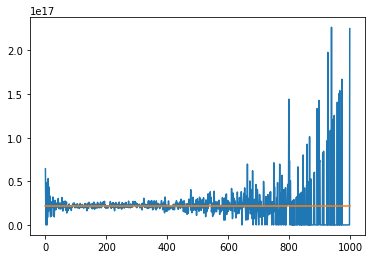

In [80]:
T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak

# Range of frequencies to plot
# nu = np.linspace(200, 900, 1000)
nu = np.linspace(1e9, 900e9, int(1e5))

def planck(nu, T):
    return 2 * h * nu ** 3 / (c ** 2 * (np.exp(h * nu / (k_B * T)) - 1))

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(20, 900)
plt.show()

maximum = max(planck(nu, T))

def sample_blackbody(nus, size):
    y = np.random.uniform(nus[0], nus[-1], size=size)
    samples = []
    for freq in y:
        rand = np.random.uniform(0, maximum)
        if rand < planck(freq, T):
            samples.append(freq)
    return np.array(samples)

def sample_powerlaw(x_0, x_1, n, size):
    y = np.random.uniform(0, 1, size=size)
    return ((x_1**(n+1) - x_0**(n+1)) * y + x_0**(n+1))**(1./(n+1))

eV2Hz = eV / h
T_e = 1e8
v = np.sqrt(2 * k_B * T_e / m_e)
beta = v / c
gamma = 1 / np.sqrt(1 - beta ** 2)
print(gamma)
# E_in = 1 * eV2Hz
tau = 0.01
# L_s = 1e43

blackbody_freqs = sample_blackbody(nu, len(nu))
flat = [nu_peak]*len(blackbody_freqs)

hist_b, bins_b = np.histogram(blackbody_freqs, bins=int(1e3))
fqs_b = 0.5 * (bins_b[1:] + bins_b[:-1])
dfq_b = fqs_b[1] - fqs_b[0]

C_0 = hist_b / planck(fqs_b, T)

plt.loglog(fqs_b / 1e9, hist_b / C_0 / 1e-23 / 1e6)
plt.xlabel('Frequency [Hz]')
# plt.ylabel('Luminosity [ergs/s/Hz]')
plt.xlim(20, 900)
plt.show()

C_0 = hist_b / planck(fqs_b, T)
plt.plot(C_0)
plt.plot([np.mean(C_0)]*len(C_0))


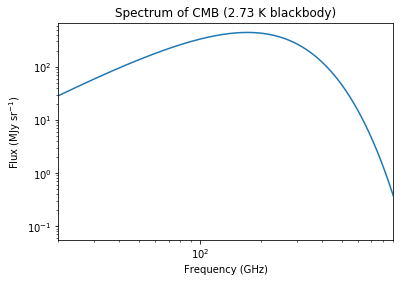

1.0159281922178944


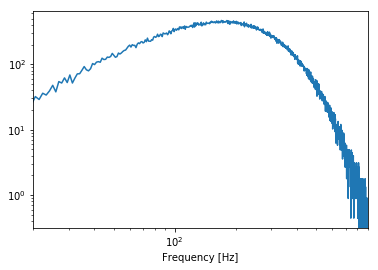

308127
3081
308127


/Users/bryanbrzycki/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


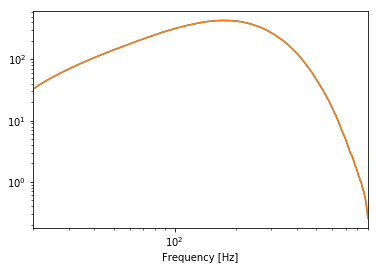

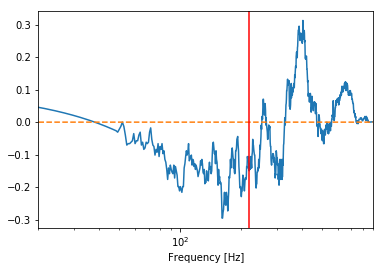

In [116]:
from scipy.signal import savgol_filter

T = 2.725

# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak

# Range of frequencies to plot
# nu = np.linspace(200, 900, 1000)
nu = np.linspace(1e9, 900e9, int(1e6))

def planck(nu, T):
    return 2 * h * nu ** 3 / (c ** 2 * (np.exp(h * nu / (k_B * T)) - 1))

plt.plot(nu / 1e9, planck(nu, T) / 1e-23 / 1e6)
plt.title(r'Spectrum of CMB (2.73 K blackbody)')
plt.xlabel(r'Frequency (GHz)')
plt.ylabel(r'Flux (MJy sr$^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(20, 900)
plt.show()

maximum = max(planck(nu, T))

def sample_blackbody(nus, size):
    y = np.random.uniform(nus[0], nus[-1], size=size)
    samples = []
    for freq in y:
        rand = np.random.uniform(0, maximum)
        if rand < planck(freq, T):
            samples.append(freq)
    return np.array(samples)

def sample_powerlaw(x_0, x_1, n, size):
    y = np.random.uniform(0, 1, size=size)
    return ((x_1**(n+1) - x_0**(n+1)) * y + x_0**(n+1))**(1./(n+1))

eV2Hz = eV / h
T_e = 1e8
v = np.sqrt(2 * k_B * T_e / m_e)
beta = v / c
gamma = 1 / np.sqrt(1 - beta ** 2)
print(gamma)
# E_in = 1 * eV2Hz
tau = 0.01
# L_s = 1e43

blackbody_freqs = sample_blackbody(nu, len(nu))
flat = [nu_peak]*len(blackbody_freqs)

hist_b, bins_b = np.histogram(blackbody_freqs, bins=int(1e3))
fqs_b = 0.5 * (bins_b[1:] + bins_b[:-1])
dfq_b = fqs_b[1] - fqs_b[0]

C_0 = np.mean(hist_b / planck(fqs_b, T))

plt.loglog(fqs_b / 1e9, hist_b / C_0 / 1e-23 / 1e6)
plt.xlabel('Frequency [Hz]')
# plt.ylabel('Luminosity [ergs/s/Hz]')
plt.xlim(20, 900)
plt.show()

N_p = int(tau * len(blackbody_freqs))
# N_p = len(blackbody_freqs)
# L_p = L_s / N_p

cos1 = np.random.uniform(-1, 1, N_p)
cos2 = np.random.uniform(-1, 1, N_p)

affected = blackbody_freqs[:N_p]
unaffected = blackbody_freqs[N_p:]
E_outs = np.append(affected * gamma ** 2 * (1 - beta * cos1) * (1 + beta * cos2), unaffected)
print(len(blackbody_freqs))
print(N_p)
print(len(E_outs))
hist, bins = np.histogram(E_outs, bins=bins_b)
fqs = 0.5 * (bins[1:] + bins[:-1])
dfq = fqs[1] - fqs[0]
# L_out = hist * L_p * fqs / E_in * (1 - np.exp(-tau)) / dfq


curve1 = savgol_filter((hist_b) / C_0 / 1e-23 / 1e6, int(1e2)+1, 1)
curve2 = savgol_filter((hist) / C_0 / 1e-23 / 1e6, int(1e2)+1, 1)

plt.loglog(fqs_b / 1e9, curve1)
plt.loglog(fqs / 1e9, curve2)
plt.xlabel('Frequency [Hz]')
# plt.ylabel('Luminosity [ergs/s/Hz]')
plt.xlim(20, 900)
plt.show()

plt.plot(fqs_b / 1e9, curve2 - curve1)
# plt.plot(fqs / 1e9, savgol_filter(hist - hist_b, 75, 1))
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.xlabel('Frequency [Hz]')
# plt.ylabel('Luminosity [ergs/s/Hz]')
plt.xlim(20, 900)
plt.xscale('log')

plt.show()

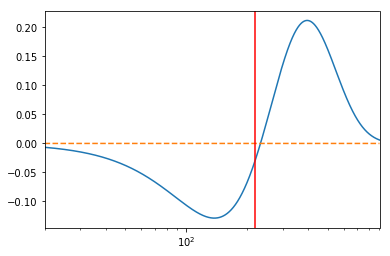

In [138]:
T = 2.725


# Specific constants
lambda_peak = 0.28977729 * T
nu_peak = c / lambda_peak

y = 1e-4

# Range of frequencies to plot
nu = np.linspace(1e9, 900e9, int(1e4))

x = h * nu / (k_B * T)

I_0 = 2*(k_B * T)**3/(h*c)**2

g = x**4*np.exp(x)/(np.exp(x)-1)**2 * (x*(np.exp(x)+1)/(np.exp(x)-1)-4)

dI = g * I_0 * y

plt.plot(nu/1e9, dI / 1e-23 / 1e6)
plt.plot(nu / 1e9, nu * 0, '--')
plt.axvline(x=218, color='r')
plt.xlim(20, 900)
plt.xscale('log')